In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, kstest, ttest_ind, f_oneway, kruskal

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('../data/advertising.csv', 
                 index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
sm.stats.ztest(df['newspaper'], df['radio'])

(3.911403345381785, 9.176137849809707e-05)

In [5]:
sm.stats.ztest(df['newspaper'], df['TV'])

(-18.599207068890937, 3.2609543835773155e-77)

In [6]:
sm.stats.ztest(df['radio'], df['TV'])

(-20.090924203363993, 8.859753122853523e-90)

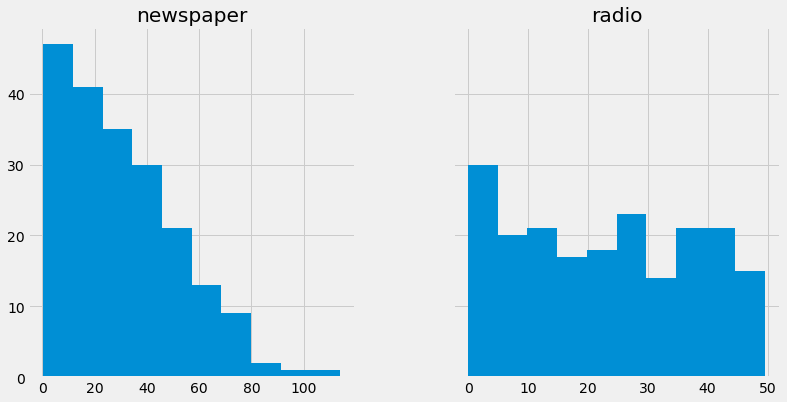

In [7]:
df[['radio','newspaper']].hist(sharey=True, figsize=(12,6));

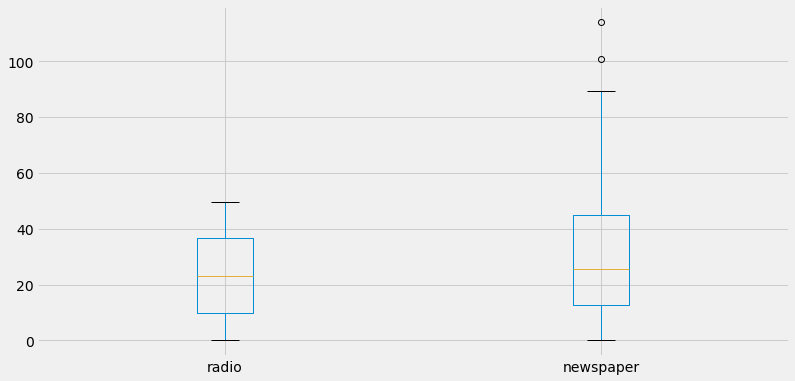

In [8]:
df[['radio','newspaper']].boxplot(figsize=(12,6));

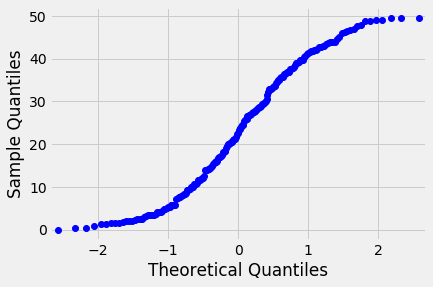

In [9]:
x = qqplot(df['radio'])

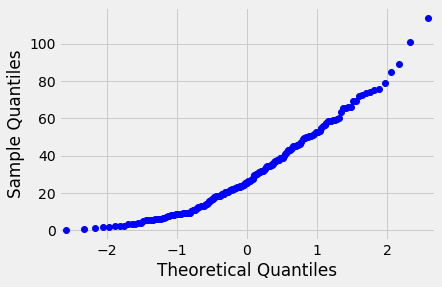

In [10]:
y = qqplot(df['newspaper'])

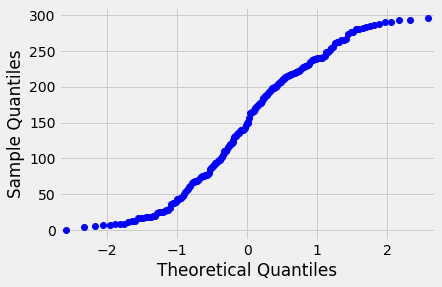

In [11]:
z = qqplot(df['TV'])

In [12]:
shapiro(df['radio'])

(0.9440046548843384, 5.196915822125447e-07)

In [13]:
shapiro(df['TV'])

(0.9495093822479248, 1.6926975376918563e-06)

In [14]:
shapiro(df['newspaper'])

(0.9363998770713806, 1.1271832534021087e-07)

In [15]:
df['tv_std'] = (df['TV'] - df['TV'].mean()) / df['TV'].std()

In [16]:
df['r_std'] = (df['radio'] - df['radio'].mean()) / df['radio'].std()

In [17]:
df['np_std'] = (df['newspaper'] - df['newspaper'].mean()) / df['newspaper'].std()

In [18]:
kstest(df['tv_std'], 'norm')

KstestResult(statistic=0.08702777360435543, pvalue=0.09105894038816142)

In [19]:
kstest(df['r_std'], 'norm')

KstestResult(statistic=0.08395825811656044, pvalue=0.11261277203399489)

In [20]:
kstest(df['np_std'], 'norm')

KstestResult(statistic=0.09850995031682896, pvalue=0.03844791153432059)

In [21]:
data1 = [0] * 50
data1.extend(np.random.normal(14,4,150))
np.random.shuffle(data1)

data2 = [0] * 100
data2.extend(np.random.normal(20,5,100))
np.random.shuffle(data2)

df_1 = pd.DataFrame({"a":data1,
                     "b":data2})

In [22]:
df_1.head()

,a,b
0,16.437901,21.545108
1,0.000000,12.751734
2,0.000000,0.000000
3,0.000000,18.927899
4,15.017768,33.658585


In [23]:
sm.stats.ztest(df_1['a'], df_1['b'])

(0.8498761195336659, 0.3953939636661413)

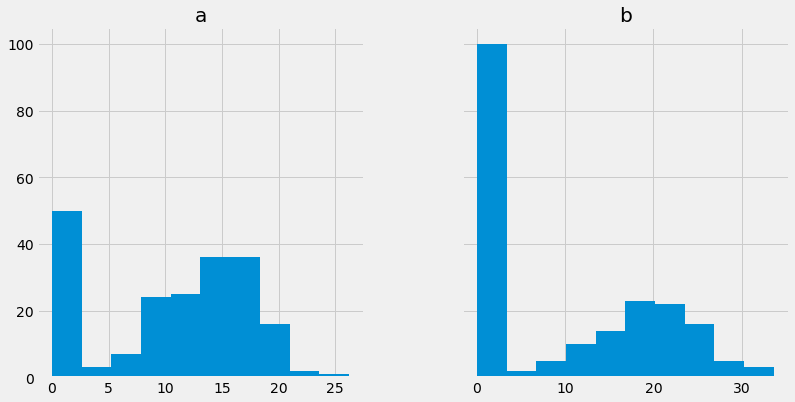

In [24]:
df_1[['a','b']].hist(sharey=True, figsize=(12,6));

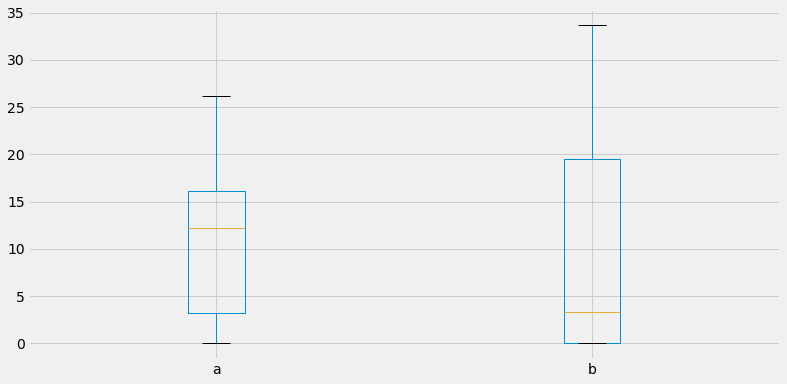

In [25]:
df_1[['a','b']].boxplot(figsize=(12,6));

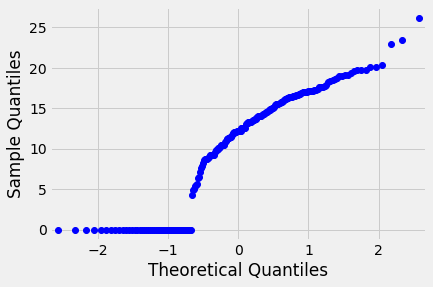

In [26]:
a = qqplot(df_1['a'])

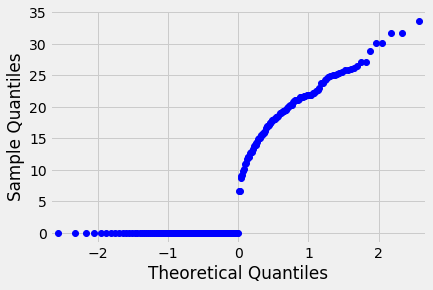

In [27]:
b = qqplot(df_1['b'])

In [28]:
shapiro(df_1['a'])

(0.8874598145484924, 4.2883491896406056e-11)

In [29]:
shapiro(df_1['b'])

(0.7995350956916809, 2.6734712449356718e-15)

In [30]:
df_1['a_std'] = (df_1['a'] - df_1['a'].mean()) / df_1['a'].std()
df_1['b_std'] = (df_1['b'] - df_1['b'].mean()) / df_1['b'].std()

In [31]:
kstest(df_1['a_std'], 'norm')

KstestResult(statistic=0.18281809476931943, pvalue=2.536076162629186e-06)

In [32]:
kstest(df_1['b_std'], 'norm')

KstestResult(statistic=0.3212225282106894, pvalue=0.0)

In [36]:
ttest_ind(df_1['a'], df_1['b'],
          equal_var = False)

Ttest_indResult(statistic=0.8498761195336659, pvalue=0.3959824529586864)

In [43]:
f_oneway(df['radio'], df['TV'], df['newspaper'])

F_onewayResult(statistic=358.8514595342596, pvalue=4.552931539744962e-103)

In [44]:
kruskal(df['radio'], df['TV'], df['newspaper'])

KruskalResult(statistic=257.66637166931656, pvalue=1.1180424828789922e-56)